# Kaggle Bisaillon Dataset

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords 
import string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize 

import tensorflow as tf

## Loading `csv`

In [2]:
true_filepath = '../raw_data/kaggle_Bisaillon/True.csv'
fake_filepath = '../raw_data/kaggle_Bisaillon/Fake.csv'

true = pd.read_csv(true_filepath)
fake = pd.read_csv(fake_filepath)

print('-'*80)
print(f"true shape: {true.shape}")
print(f"fake shape: {fake.shape}")
print('-'*80)

--------------------------------------------------------------------------------
true shape: (21417, 4)
fake shape: (23481, 4)
--------------------------------------------------------------------------------


In [3]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Preprocessing

### Duplicates

In [4]:
def count_duplicate(df):
    return df.duplicated().sum()

In [5]:
print('-'*80)
print(f"true duplicates: {count_duplicate(true)}")
print(f"fake duplicates: {count_duplicate(fake)}")
print('-'*80)

--------------------------------------------------------------------------------
true duplicates: 206
fake duplicates: 3
--------------------------------------------------------------------------------


In [6]:
true.drop_duplicates(inplace=True)
fake.drop_duplicates(inplace=True)

print('-'*80)
print(f"true shape (wo duplicates): {true.shape}")
print(f"fake shape (wo duplicates): {fake.shape}")
print('-'*80)

--------------------------------------------------------------------------------
true shape (wo duplicates): (21211, 4)
fake shape (wo duplicates): (23478, 4)
--------------------------------------------------------------------------------


### Merging the `true` / `fake` dataframes

In [7]:
true['category'] = 0
fake['category'] = 1

data = pd.concat([true, fake]).reset_index()

print('-'*80)
print(f"data shape: {data.shape}")
print('-'*80)
print(f"ratio #true: {len(data[data['category']==0])/len(data)*100:.2f}%")
print(f"ratio #false: {len(data[data['category']==1])/len(data)*100:.2f}%")
print('-'*80)

--------------------------------------------------------------------------------
data shape: (44689, 6)
--------------------------------------------------------------------------------
ratio #true: 47.46%
ratio #false: 52.54%
--------------------------------------------------------------------------------


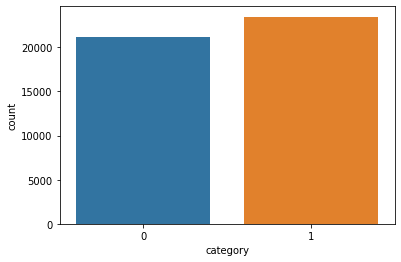

In [8]:
sns.countplot(x=data.category);

### Missing values

In [9]:
def get_missing(df):
    missing_values = df.isnull().sum().sort_values(ascending = False)
    ratio = missing_values/len(data)*100
    return pd.DataFrame({'missing_values': missing_values, 'ratio': round(ratio)}).head(10)

In [10]:
get_missing(data)

,missing_values,ratio
index,0,0.0
title,0,0.0
text,0,0.0
subject,0,0.0
date,0,0.0
category,0,0.0


### EDA

In [11]:
data.subject.value_counts()

politicsNews       11220
worldnews           9991
News                9050
politics            6838
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

### Reducing Data

In [15]:
data.shape

(44689, 6)

In [16]:
data_reduced = data.sample(1000)

print('-'*80)
print(f"data_reduced shape: {data_reduced.shape}")
print('-'*80)
print(f"ratio #true: {len(data_reduced[data_reduced['category']==0])/len(data_reduced)*100:.2f}%")
print(f"ratio #false: {len(data_reduced[data_reduced['category']==1])/len(data_reduced)*100:.2f}%")
print('-'*80)

--------------------------------------------------------------------------------
data_reduced shape: (1000, 6)
--------------------------------------------------------------------------------
ratio #true: 47.20%
ratio #false: 52.80%
--------------------------------------------------------------------------------


### Cleaning

In [17]:
def clean (text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ') # Remove Punctuation
    lowercased = text.lower() # Lower Case
    tokenized = word_tokenize(lowercased) # Tokenize
    words_only = [word for word in tokenized if word.isalpha()] # Remove numbers
    stop_words = set(stopwords.words('english')) # Make stopword list
    without_stopwords = [word for word in words_only if not word in stop_words] # Remove Stop Words
    lemma=WordNetLemmatizer() # Initiate Lemmatizer
    lemmatized = [lemma.lemmatize(word) for word in without_stopwords] # Lemmatize
    return lemmatized

In [20]:
data_reduced.head()

,index,title,text,subject,date,category,clean_text
5920,5957,Trump says he had 'very good' call with Mexico...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"January 27, 2017",0,"[washington, reuters, u, president, donald, tr..."
35726,14517,"WATCH: BEYONCE Performed This Sickening, Cop-H...","How very progressive After all, what would Su...",politics,"Feb 7, 2016",1,"[progressive, would, super, bowl, sunday, with..."
31557,10347,Woman Born In NAZI GERMANY Says Trump Doesn’t ...,A woman who was born in Nazi Germany says that...,politics,"Jul 20, 2017",1,"[woman, born, nazi, germany, say, reminds, hit..."
42486,21278,New Batman Comic Features Batman Saving Black ...,Full frontal Leftist propaganda As a side note...,left-news,"Nov 30, 2015",1,"[full, frontal, leftist, propaganda, side, not..."
31986,10776,DEMOCRAT ALAN DERSHOWITZ Schools Jeffrey Tubin...,Alan Dershowitz schools his former student Jef...,politics,"May 27, 2017",1,"[alan, dershowitz, school, former, student, je..."


In [21]:
# Apply to all texts
data_reduced['clean_text'] = data_reduced.text.apply(clean)
# data['clean_text'] = data['clean_text'].astype('str')

In [24]:
data_reduced.head()

,index,title,text,subject,date,category,clean_text
5920,5957,Trump says he had 'very good' call with Mexico...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"January 27, 2017",0,"[washington, reuters, u, president, donald, tr..."
35726,14517,"WATCH: BEYONCE Performed This Sickening, Cop-H...","How very progressive After all, what would Su...",politics,"Feb 7, 2016",1,"[progressive, would, super, bowl, sunday, with..."
31557,10347,Woman Born In NAZI GERMANY Says Trump Doesn’t ...,A woman who was born in Nazi Germany says that...,politics,"Jul 20, 2017",1,"[woman, born, nazi, germany, say, reminds, hit..."
42486,21278,New Batman Comic Features Batman Saving Black ...,Full frontal Leftist propaganda As a side note...,left-news,"Nov 30, 2015",1,"[full, frontal, leftist, propaganda, side, not..."
31986,10776,DEMOCRAT ALAN DERSHOWITZ Schools Jeffrey Tubin...,Alan Dershowitz schools his former student Jef...,politics,"May 27, 2017",1,"[alan, dershowitz, school, former, student, je..."


## Training

In [31]:
X = data_reduced['clean_text'].copy()
y = data_reduced['category'].copy()

print('-'*80)
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print('-'*80)

--------------------------------------------------------------------------------
X shape: (1000,)
y shape: (1000,)
--------------------------------------------------------------------------------


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('-'*80)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print('-'*80)
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print('-'*80)

--------------------------------------------------------------------------------
X_train shape: (700,)
y_train shape: (700,)
--------------------------------------------------------------------------------
X_test shape: (300,)
y_test shape: (300,)
--------------------------------------------------------------------------------


### sklearn - Naive Bayes

In [93]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate

vectorizer = CountVectorizer()

X_train_vec = vectorizer.fit_transform(X_train[0])

# cv_nb = cross_validate( MultinomialNB(), X_bow, data.target, scoring = "accuracy")

# cv_nb['test_score'].mean()




KeyError: 0

### Tokenizer

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer

# This initializes a Keras utilities that does all the tokenization for you
tokenizer = Tokenizer()

# The tokenization learns a dictionnary that maps a token (integer) to each word
# It can be done only on the train set - we are not supposed to know the test set !
# This tokenization also lower your words, apply some filters, and so on - you can check the doc if you want
tokenizer.fit_on_texts(X_train)
    
# We apply the tokenization to the train and test set
X_train_token = tokenizer.texts_to_sequences(X_train)
X_test_token = tokenizer.texts_to_sequences(X_test)

print('-'*80)
print(f"X_train_token shape: {len(X_train_token)}")
print(f"X_test_token shape: {len(X_test_token)}")
print('-'*80)

--------------------------------------------------------------------------------
X_train_token shape: 700
X_test_token shape: 300
--------------------------------------------------------------------------------


In [40]:
vocab_size = len(tokenizer.word_index)

print('-'*80)
print(f"vocab_size: {vocab_size}")
print('-'*80)

--------------------------------------------------------------------------------
vocab_size: 16130
--------------------------------------------------------------------------------


### Padding

In [41]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_pad = pad_sequences(X_train_token, dtype='float32', padding='post')
X_test_pad = pad_sequences(X_test_token, dtype='float32', padding='post')
# X_test_pad = pad_sequences(X_test_token, maxlen=X_train_pad.shape[1], dtype='float32', padding='post')

print('-'*80)
print(f"X_train_pad shape: {X_train_pad.shape}")
print(f"y_train shape: {len(y_train)}")
print('-'*80)
print(f"X_test_pad shape: {X_test_pad.shape}")
print(f"y_test shape: {len(y_test)}")
print('-'*80)

--------------------------------------------------------------------------------
X_train_pad shape: (700, 2037)
y_train shape: 700
--------------------------------------------------------------------------------
X_test_pad shape: (300, 1721)
y_test shape: 300
--------------------------------------------------------------------------------


### Tensorflow - embedding layer included

In [45]:
def init_model():

    embedding_size = 5

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Embedding(
        input_dim = vocab_size+1,
        input_length = 2037, # Max_sentence_length (optional, for model summary)
        output_dim = embedding_size,# 100
        mask_zero = True, # Included masking layer :)
    ))

    model.add(tf.keras.layers.LSTM(20, activation='tanh'))
    model.add(tf.keras.layers.Dense(5, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    
    return model

In [46]:
init_model().summary()

2021-08-17 20:04:59.709124: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2037, 5)           80655     
_________________________________________________________________
lstm (LSTM)                  (None, 20)                2080      
_________________________________________________________________
dense (Dense)                (None, 5)                 105       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 82,846
Trainable params: 82,846
Non-trainable params: 0
_________________________________________________________________


In [48]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model = init_model()

history = model.fit(X_train_pad, 
                  y_train,
                  validation_split=0.2,
                  batch_size=64,
                  epochs=20, 
                  callbacks=[es],
                  verbose=1)

Epoch 1/20
9/9 [==============================] - 10s 824ms/step - loss: 0.6917 - accuracy: 0.5357 - val_loss: 0.6925 - val_accuracy: 0.4714
Epoch 2/20
9/9 [==============================] - 6s 715ms/step - loss: 0.6851 - accuracy: 0.5286 - val_loss: 0.6867 - val_accuracy: 0.4714
Epoch 3/20
9/9 [==============================] - 7s 727ms/step - loss: 0.6688 - accuracy: 0.5482 - val_loss: 0.6715 - val_accuracy: 0.4714
Epoch 4/20
9/9 [==============================] - 7s 740ms/step - loss: 0.6378 - accuracy: 0.5268 - val_loss: 0.5846 - val_accuracy: 0.4571
Epoch 5/20
9/9 [==============================] - 7s 737ms/step - loss: 0.5181 - accuracy: 0.7589 - val_loss: 0.6369 - val_accuracy: 0.5929
Epoch 6/20
9/9 [==============================] - 7s 745ms/step - loss: 0.4833 - accuracy: 0.9179 - val_loss: 0.4914 - val_accuracy: 0.7643
Epoch 7/20
9/9 [==============================] - 6s 725ms/step - loss: 0.4436 - accuracy: 0.9625 - val_loss: 0.4732 - val_accuracy: 0.8071
Epoch 8/20
9/9 [===

In [56]:
def plot_loss(history, title=None):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=1)
    ax1.legend(['Train', 'Validation'], loc='best')

    ax2.plot(history.history['accuracy'])
    ax2.plot(history.history['val_accuracy'])
    ax2.set_title('ACC')
    ax2.set_ylabel('ACC')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=1)
    ax2.legend(['Train', 'Validation'], loc='best')
    if title:
        fig.suptitle(title)
    plt.show()

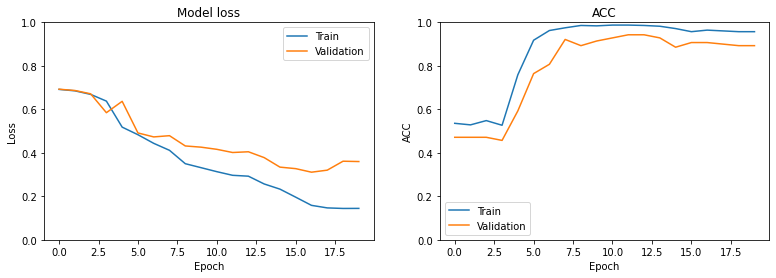

In [57]:
plot_loss(history, title=None)

In [58]:
results = model.evaluate(X_test_pad, y_test)

print('-'*80)
print(f"test score (MAPE): {results[1]:.3f}")
print('-'*80)

10/10 [==============================] - 2s 81ms/step - loss: 0.2983 - accuracy: 0.9133 0s - loss: 0.4399 - 
--------------------------------------------------------------------------------
test score (MAPE): 0.913
--------------------------------------------------------------------------------


### Word2Vec

In [60]:
from gensim.models import Word2Vec

word2vec = Word2Vec(sentences=X_train, vector_size=10, min_count=10, window=10)

unique = set([_ for elt in X_train for _ in elt])

print('-'*80)
print(f"X_train vocabulary size: {len(unique)}")
print(f"word2vec vocabulary size: {len(word2vec.wv.key_to_index)}")    
print('-'*80)

--------------------------------------------------------------------------------
X_train vocabulary size: 16130
word2vec vocabulary size: 2864
--------------------------------------------------------------------------------


In [61]:
def embed_sentence(word2vec, sentence):
    embed_matrix = []
    for word in sentence:
        if word in word2vec.wv.key_to_index:
            embed_matrix.append(word2vec.wv[word])
    return np.array(embed_matrix)

def embedding(word2vec, sentences):
    return [embed_sentence(word2vec, sentence) for sentence in sentences]

In [67]:
X_train_embed = embedding(word2vec, X_train)
X_test_embed = embedding(word2vec, X_test)

X_train_embed[0].shape

(38, 10)

In [69]:
X_train_pad = pad_sequences(X_train_embed, dtype='float32', padding='post')
X_test_pad = pad_sequences(X_test_embed, dtype='float32', padding='post')
# X_test_pad = pad_sequences(X_test_token, maxlen=X_train_pad.shape[1], dtype='float32', padding='post')

print('-'*80)
print(f"X_train_pad shape: {X_train_pad.shape}")
print(f"y_train shape: {len(y_train)}")
print('-'*80)
print(f"X_test_pad shape: {X_test_pad.shape}")
print(f"y_test shape: {len(y_test)}")
print('-'*80)

--------------------------------------------------------------------------------
X_train_pad shape: (700, 1625, 10)
y_train shape: 700
--------------------------------------------------------------------------------
X_test_pad shape: (300, 1365, 10)
y_test shape: 300
--------------------------------------------------------------------------------


### Tensorflow - Word2Vec

In [81]:
def init_model():

    embedding_size = 10

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Masking())
    model.add(tf.keras.layers.LSTM(20, activation='tanh'))
    model.add(tf.keras.layers.Dense(5, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    
    return model

In [86]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model = init_model()

history = model.fit(X_train_pad, 
                  y_train,
                  validation_split=0.2,
                  batch_size=64,
                  epochs=30, 
                  callbacks=[es],
                  verbose=1)

Epoch 1/30
9/9 [==============================] - 9s 650ms/step - loss: 0.6458 - accuracy: 0.6982 - val_loss: 0.5775 - val_accuracy: 0.8143
Epoch 2/30
9/9 [==============================] - 5s 547ms/step - loss: 0.5841 - accuracy: 0.7946 - val_loss: 0.5083 - val_accuracy: 0.8643
Epoch 3/30
9/9 [==============================] - 5s 543ms/step - loss: 0.5079 - accuracy: 0.8446 - val_loss: 0.4035 - val_accuracy: 0.8786
Epoch 4/30
9/9 [==============================] - 5s 539ms/step - loss: 0.4188 - accuracy: 0.8786 - val_loss: 0.3414 - val_accuracy: 0.9000
Epoch 5/30
9/9 [==============================] - 5s 570ms/step - loss: 0.3687 - accuracy: 0.8929 - val_loss: 0.3012 - val_accuracy: 0.9214
Epoch 6/30
9/9 [==============================] - 5s 572ms/step - loss: 0.3459 - accuracy: 0.8982 - val_loss: 0.3296 - val_accuracy: 0.8786
Epoch 7/30
9/9 [==============================] - 5s 572ms/step - loss: 0.3511 - accuracy: 0.8786 - val_loss: 0.2713 - val_accuracy: 0.9143
Epoch 8/30
9/9 [====

In [87]:
def plot_loss(history, title=None):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=1)
    ax1.legend(['Train', 'Validation'], loc='best')

    ax2.plot(history.history['accuracy'])
    ax2.plot(history.history['val_accuracy'])
    ax2.set_title('ACC')
    ax2.set_ylabel('ACC')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=1)
    ax2.legend(['Train', 'Validation'], loc='best')
    if title:
        fig.suptitle(title)
    plt.show()

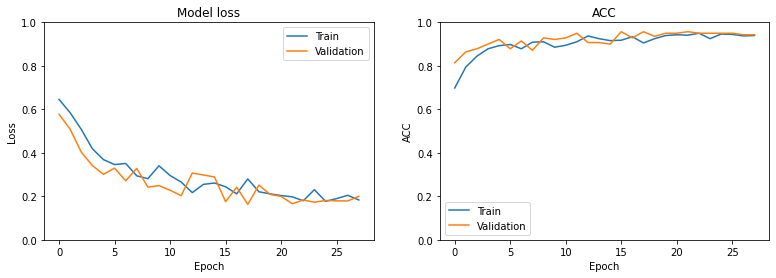

In [88]:
plot_loss(history, title=None)

In [89]:
results = model.evaluate(X_test_pad, y_test)

print('-'*80)
print(f"test score (MAPE): {results[1]:.3f}")
print('-'*80)

10/10 [==============================] - 2s 72ms/step - loss: 0.2586 - accuracy: 0.9133
--------------------------------------------------------------------------------
test score (MAPE): 0.913
--------------------------------------------------------------------------------


In [90]:
X_train

6307     [new, york, reuters, u, president, elect, dona...
12841    [london, reuters, british, man, posted, pictur...
35637    [never, seems, shortage, smug, know, self, rig...
9132     [reuters, alabama, house, speaker, mike, hubba...
38549    [like, hillary, stephanopoulos, claim, honest,...
                               ...                        
39169    [celebrity, came, together, create, emotional,...
32904                  [http, www, youtube, com, watch, v]
23714    [according, white, house, press, secretary, se...
43519    [century, wire, say, back, august, united, nat...
23751    [donald, trump, entire, administration, seem, ...
Name: clean_text, Length: 700, dtype: object